# Housing Prices Classification

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

### Loading the dataset
The dataset file 'Ames_Housing_Sales.csv' is read using `pandas.csv_reader`, and stored in a `pandas.DataFrame`

In [15]:
df = pd.read_csv('Ames_Housing_Sales.csv', na_values='None')

In [16]:
# viewing the dataset in table format
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


`DataFrame.info()` is used to provide information about each data feature (`column`), namely, the name, the number of non-null entries, and the datatype(`Dtype`).

In [17]:
#displaying information for each feature (column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          82 non-null     object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       953 non-null    object 
 7   BsmtExposure   953 non-null    object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   953 non-null    object 
 11  BsmtFinType2   952 non-null    object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       953 non-null    object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

### Data Cleaning

#### Check Null Values
the `DataFrame.isna()` function of the DataFrame is used to return the subset of the data containing `null` values and storing the `sum()` into `na_vals`.
The subset of columns containing null values is displayed along with the number of null values for each column.

In [18]:
# Check missing values
na_vals = df.isna().sum()

#filter out the columns that have 0 null values
na_cols = na_vals[na_vals > 0]

print(f" == {len(na_cols)} Columns ==")
print(na_cols)

 == 11 Columns ==
Alley           1297
BsmtCond         426
BsmtExposure     426
BsmtFinType1     426
BsmtFinType2     427
BsmtQual         426
Fence           1114
FireplaceQu      618
MasVnrType       797
MiscFeature     1328
PoolQC          1372
dtype: int64


As can be seen, the number of missing values for each column is very high. This indicates that the features entailed are not reliable for data analysis. The columns will be dropped to avoid losing the bulk of data from the dataset. The `DataFrame.dropna()` function is utilized along `axis = 1`, indicating the `columns` instead of rows.

In [19]:
df.dropna(axis=1, inplace=True)

#### Check Duplicates
The dataset is checked for duplicated values using `DataFrame.duplicated()`. `sum()` yields the total number of duplicates.

In [20]:
df.duplicated().sum()

0

No duplicates found. No further actions are needed.

#### Get numerical & categorical features
The dataset is analyzed against the presence of categorical features. This is in order to later encode them to be ready for classification.
`DataFrame.select_dtypes` returns the subset of the data of a specific datatype or superset of datatypes.
A `pandas.Index` is created from the subtraction of the set of numerical features from the total set of features.

In [21]:
#return columns of `np.number` datatype
num_cols = df.select_dtypes(np.number).columns

#substract numerical columns from the total set of columns to get categorical features
cat_cols = pd.Index(list(set(df.columns) - set(num_cols)))

The `cat_cols` index is used to index `df` to obtain the number of unique values for each feature. This is accomplished using `DataFrame.nunique()`

In [22]:
# Check unique values for each feature
df[cat_cols].nunique()

Foundation        6
KitchenQual       4
RoofStyle         6
Heating           6
GarageType        6
LotShape          4
CentralAir        2
GarageCond        5
GarageQual        5
Exterior2nd      16
Electrical        5
Exterior1st      14
MSZoning          5
Condition2        8
LandSlope         3
ExterQual         4
GarageFinish      3
Functional        7
SaleType          9
BldgType          5
Utilities         2
Neighborhood     25
SaleCondition     6
LotConfig         5
ExterCond         4
Condition1        9
HouseStyle        8
RoofMatl          8
LandContour       4
Street            2
PavedDrive        3
HeatingQC         5
dtype: int64

#### Encode categorical features
The `LabelEncoder` class from scikit-learn is imported to assign a unique integer value for each unique category.
The `LabelEncoder.fit_transform()` function firstly computes the unique integers for each feature and then transforms the original dataset `df`.

In [23]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Iterate over the categorical features of df and transform them
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

In [24]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,0,706.0,0.0,1,0,150.0,...,0.0,1,8,856.0,0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,0,978.0,0.0,0,1,284.0,...,0.0,1,6,1262.0,0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,0,486.0,0.0,1,0,434.0,...,0.0,1,6,920.0,0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,0,216.0,0.0,1,0,540.0,...,0.0,1,7,756.0,0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,0,655.0,0.0,1,0,490.0,...,0.0,1,9,1145.0,0,192.0,2000,2000,2008,250000.0


As can be observed, the data is now purely numerical.

#### Outlier Removal
In this section, the dataset will be analyzed against the presence of outliers, and if detected, will be removed.
The target variable "SalePrice" is stored in variable `y`. It is, then, visualized using a Box Plot.

<Axes: >

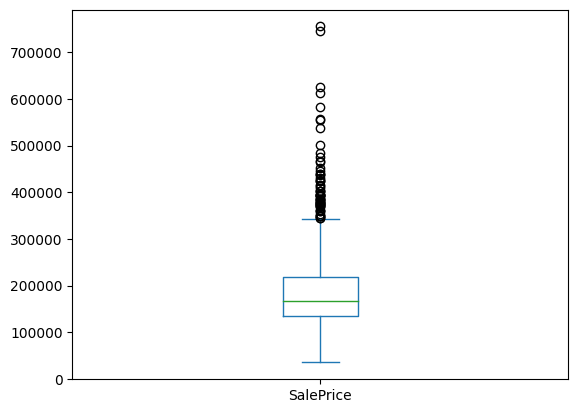

In [25]:
y = df["SalePrice"]
y.plot(kind="box")

As can be observed, a number of outliers is are located outside the third quartile. Below, it is seen that these datapoints are only 76. They will be removed, for 76 is a small number compared to the size of the dataset.

In [26]:
# Check number of sample above certain price
max_price = 325000
print(len(y[y > max_price]))

76


`df` is reassigned to the subset of data below the `max_price`. The dataset is then split into features `X` and target `y` i.e. the "SalePrice" feature.

In [27]:
# Samples above that number are considered as outliers
df = df[y < max_price]

# Separate data into features and target
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

### Data Scaling
The `StandardScaler` class is imported from scikit-learn to standardize features stored in `x` by removing the mean and scaling to unit variance. `fit_transform` is explained previously.

In [31]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Scale X
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.799945,1.239028,-0.117513,0.187396,-0.411888,0.664251,-0.298908,1.158936,-0.251106,-0.958988,...,0.294611,-0.276684,0.062161,1.058807,-0.443419,-0.027756,-0.750723,1.083272,0.909845,0.143770
1,0.338556,-0.802365,-0.117513,0.187396,-0.411888,1.301372,-0.298908,-0.806414,3.877845,-0.647367,...,0.294611,-0.276684,0.062161,-0.283692,0.564175,-0.027756,1.703848,0.155943,-0.407322,-0.609282
2,-0.620477,1.267713,-0.117513,0.187396,-0.411888,0.148933,-0.298908,1.158936,-0.251106,-0.298538,...,0.294611,-0.276684,0.062161,-0.283692,-0.284587,-0.027756,-0.750723,1.014581,0.861061,0.143770
3,-0.505505,1.004770,-0.117513,0.187396,-0.411888,-0.483502,-0.298908,1.158936,-0.251106,-0.052032,...,0.294611,-0.276684,0.062161,0.387558,-0.691595,-0.027756,-0.750723,-1.939134,-0.700025,-1.362334
4,0.010466,1.714716,-0.117513,1.482225,-0.411888,0.544791,-0.298908,1.158936,-0.251106,-0.168308,...,0.294611,-0.276684,0.062161,1.730057,0.273809,-0.027756,0.830745,0.980236,0.763493,0.143770


### Target Grouping
In order to classify

<AxesSubplot: >

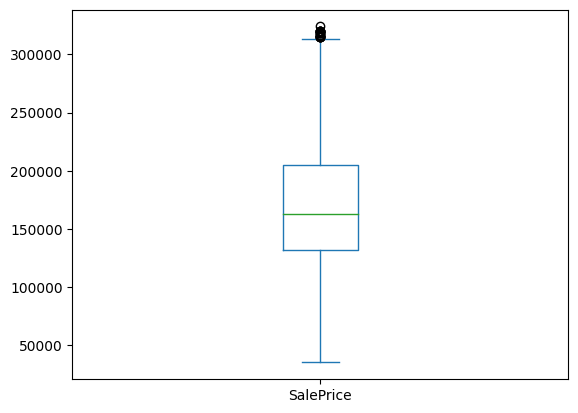

In [73]:
y.plot(kind="box")

In [74]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=10, n_init='auto')

y_clustered = pd.Series(kmeans.fit_predict(np.array(y).reshape(-1, 1)))
y_centers = pd.Series([kmeans.cluster_centers_[i] for i in y_clustered]).astype("float64")

Text(0, 0.5, 'Frequency')

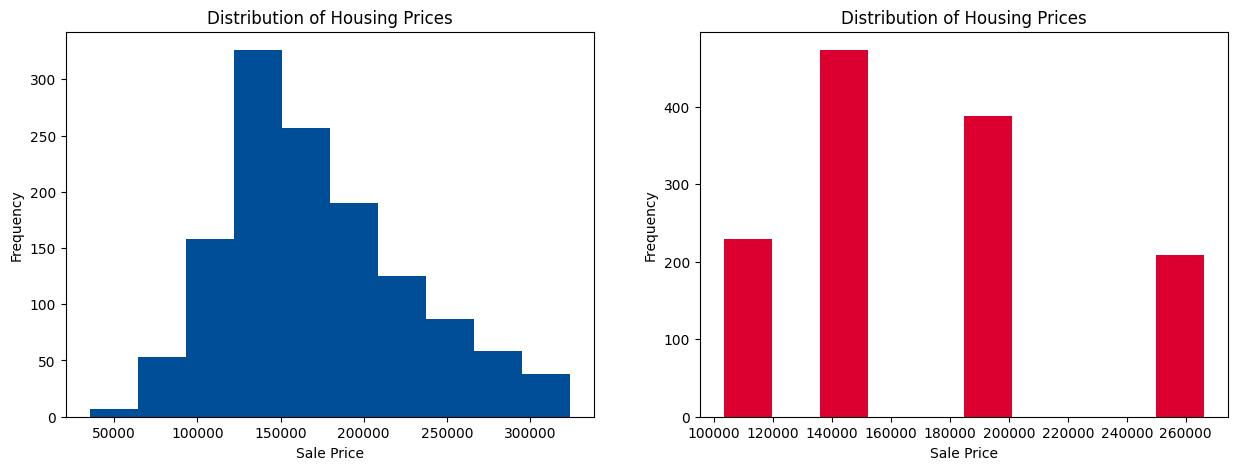

In [75]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
b = 10

y.plot(color="#004D98", kind="hist", bins=b, ax=ax[0])
ax[0].set_title('Distribution of Housing Prices')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Frequency')


y_centers.plot(color="#DB0030", kind="hist", bins=b, ax=ax[1])
ax[1].set_title('Distribution of Housing Prices')
ax[1].set_xlabel('Sale Price')
ax[1].set_ylabel('Frequency')

## Classification Algorithms

### Feature Selection

In [76]:
features = df.drop("SalePrice", axis=1).columns

In [77]:
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.feature_selection import f_classif

# f_classification
f_sel = SelectPercentile(score_func=f_classif, percentile=50)
x_fcif = f_sel.fit_transform(x, y)

# ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50).fit(x, y)
etc_sel = SelectFromModel(etc, prefit=True)
x_etc = etc_sel.transform(x)

# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50).fit(x, y)
rfc_sel = SelectFromModel(etc, prefit=True)
x_rfc = rfc_sel.transform(x)

In [78]:
selected_features = pd.Series(np.concatenate((f_sel.get_feature_names_out(features),
                                    etc_sel.get_feature_names_out(features),
                                    rfc_sel.get_feature_names_out(features))))

In [79]:
selected_features.value_counts()

1stFlrSF        3
GarageYrBlt     3
YearRemodAdd    3
YearBuilt       3
TotalBsmtSF     3
TotRmsAbvGrd    3
OverallQual     3
OpenPorchSF     3
LotShape        3
2ndFlrSF        3
LotArea         3
HeatingQC       3
GrLivArea       3
LotFrontage     3
GarageFinish    3
Fireplaces      3
BsmtFinSF1      3
GarageArea      3
BsmtUnfSF       3
BedroomAbvGr    2
BsmtFullBath    2
Exterior1st     2
Exterior2nd     2
YrSold          2
LotConfig       2
MasVnrArea      2
MoSold          2
Neighborhood    2
OverallCond     2
WoodDeckSF      2
MSSubClass      2
GarageType      1
CentralAir      1
Street          1
Electrical      1
ExterQual       1
MiscVal         1
MSZoning        1
Foundation      1
FullBath        1
KitchenQual     1
KitchenAbvGr    1
Heating         1
HalfBath        1
GarageCars      1
Condition2      1
dtype: int64

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

def train_evaluate(model, x, y, grid_params=None, cv=5):
    # split data into train & test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

    # check for applying grid search
    if grid_params is None:
        model.fit(x_train, y_train)
    else:
        model_gs = GridSearchCV(model, grid_params, scoring='balanced_accuracy', cv=cv, return_train_score=True)
        model_gs.fit(x_train, y_train)
        print(model_gs.best_params_)
        model = model_gs.best_estimator_

    # predict test results
    y_pred = model.predict(x_test)

    # show results
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion_Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

    return model

# KNN

{'n_neighbors': 9, 'weights': 'distance'}
Classification Rebort:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.65      0.82      0.73        44
           2       0.86      0.57      0.69        21
           3       0.72      0.67      0.70        46

    accuracy                           0.70       130
   macro avg       0.72      0.67      0.69       130
weighted avg       0.71      0.70      0.70       130

Confusion_Matrix:


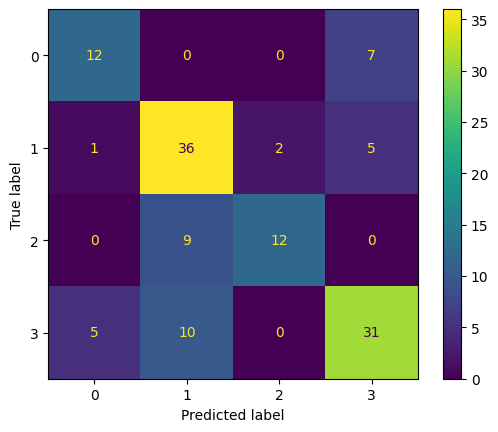

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier??
grid_params = {"n_neighbors": [5, 7, 9], "weights": ["uniform", "distance"]}
knn = train_evaluate(KNeighborsClassifier(), x_rfc, y_clustered, grid_params)

# Naive Bayes

Classification Rebort:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.63      0.73      0.67        44
           2       0.71      0.57      0.63        21
           3       0.76      0.70      0.73        46

    accuracy                           0.69       130
   macro avg       0.70      0.68      0.69       130
weighted avg       0.70      0.69      0.69       130

Confusion_Matrix:


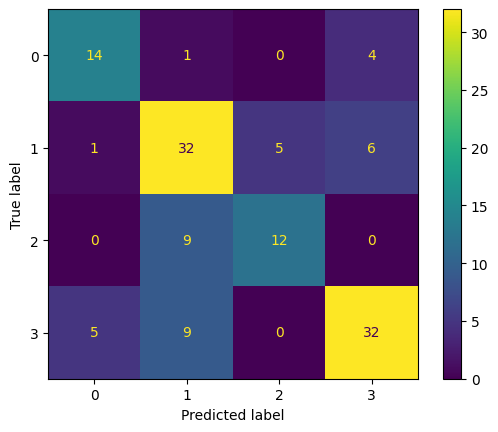

In [82]:
from sklearn.naive_bayes import GaussianNB
gnb = train_evaluate(GaussianNB(), x_rfc, y_clustered)

Classification Rebort:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.63      0.66      0.64        44
           2       0.71      0.71      0.71        21
           3       0.67      0.63      0.65        46

    accuracy                           0.65       130
   macro avg       0.65      0.66      0.66       130
weighted avg       0.66      0.65      0.65       130

Confusion_Matrix:


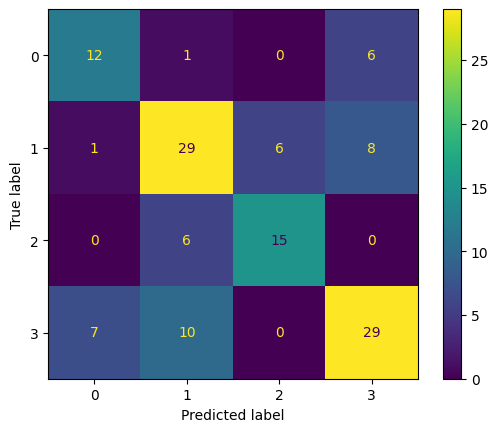

In [83]:
from sklearn.naive_bayes import BernoulliNB
mnb = train_evaluate(BernoulliNB(), x_rfc, y_clustered)

## Combining Classifiers

Classification Rebort:
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        19
           1       0.67      0.82      0.73        44
           2       0.81      0.62      0.70        21
           3       0.79      0.65      0.71        46

    accuracy                           0.72       130
   macro avg       0.73      0.71      0.71       130
weighted avg       0.73      0.72      0.71       130

Confusion_Matrix:


StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=9,
                                                     weights='distance')),
                               ('gnb', GaussianNB())],
                   final_estimator=KNeighborsClassifier(n_neighbors=9,
                                                        weights='distance'))

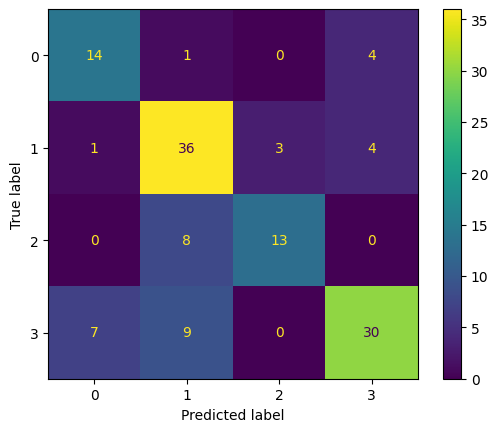

In [85]:
from sklearn.ensemble import StackingClassifier

s_knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
s_gnb = GaussianNB()
s_bnb = BernoulliNB()
stacked = StackingClassifier(estimators=[('knn', s_knn), ('gnb', s_gnb)], final_estimator=s_knn)

train_evaluate(stacked, x_rfc, y_clustered)